In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/Trade_in_Low_Carbon_Technology_Products.csv'  # Adjust path as needed
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Head:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Head:
   ObjectId                       Country ISO2 ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF  AFG   
1         2  Afghanistan, Islamic Rep. of   AF  AFG   
2         3  Afghanistan, Islamic Rep. of   AF  AFG   
3         4  Afghanistan, Islamic Rep. of   AF  AFG   
4         5  Afghanistan, Islamic Rep. of   AF  AFG   

                                           Indicator        Unit  \
0  Comparative advantage in low carbon technology...       Index   
1          Exports of low carbon technology products  US Dollars   
2  Exports of low carbon technology products as p...     Percent   
3  Exports of low carbon technology products as s...     Percent   
4          Imports of low carbon technology products  US Dollars   

                                              Source CTS_Code  \
0  Department of Economic and Social Affairs/Unit...   ECBTLA   
1  Department of Economic and Social Affairs/Unit...   ECBTLX   
2  Department of Economic and Social Affairs/Unit..

In [ ]:
import os
print(os.getcwd())  

c:\Users\Swanand Potnis\Desktop\Low_Carbon_Trade_Analysis


In [3]:
# Handle missing values
# Drop columns or fill missing data depending on their importance
df_cleaned = df.dropna()  # For simplicity, remove rows with missing data
print(f"Shape after removing missing data: {df_cleaned.shape}")

Shape after removing missing data: (443, 42)


In [4]:
# Display the first few rows
print(df_cleaned.head())

# Display column names
print("Column Names:")
print(df_cleaned.columns.tolist())

    ObjectId    Country ISO2 ISO3  \
64        65  Argentina   AR  ARG   
65        66  Argentina   AR  ARG   
67        68  Argentina   AR  ARG   
68        69  Argentina   AR  ARG   
70        71  Argentina   AR  ARG   

                                            Indicator        Unit  \
64          Exports of low carbon technology products  US Dollars   
65  Exports of low carbon technology products as p...     Percent   
67          Imports of low carbon technology products  US Dollars   
68  Imports of low carbon technology products as p...     Percent   
70      Total trade in low carbon technology products  US Dollars   

                                               Source CTS_Code  \
64  Department of Economic and Social Affairs/Unit...   ECBTLX   
65  Department of Economic and Social Affairs/Unit...   ECBTLX   
67  Department of Economic and Social Affairs/Unit...   ECBTLM   
68  Department of Economic and Social Affairs/Unit...   ECBTLM   
70  Department of Economic and S

In [5]:
# Display the first few rows of the cleaned dataset
print(df_cleaned.head())

# Check column names
print("Column Names:", df_cleaned.columns)

# Summarize numeric columns
print("Summary Statistics:")
print(df_cleaned.describe())

    ObjectId    Country ISO2 ISO3  \
64        65  Argentina   AR  ARG   
65        66  Argentina   AR  ARG   
67        68  Argentina   AR  ARG   
68        69  Argentina   AR  ARG   
70        71  Argentina   AR  ARG   

                                            Indicator        Unit  \
64          Exports of low carbon technology products  US Dollars   
65  Exports of low carbon technology products as p...     Percent   
67          Imports of low carbon technology products  US Dollars   
68  Imports of low carbon technology products as p...     Percent   
70      Total trade in low carbon technology products  US Dollars   

                                               Source CTS_Code  \
64  Department of Economic and Social Affairs/Unit...   ECBTLX   
65  Department of Economic and Social Affairs/Unit...   ECBTLX   
67  Department of Economic and Social Affairs/Unit...   ECBTLM   
68  Department of Economic and Social Affairs/Unit...   ECBTLM   
70  Department of Economic and S

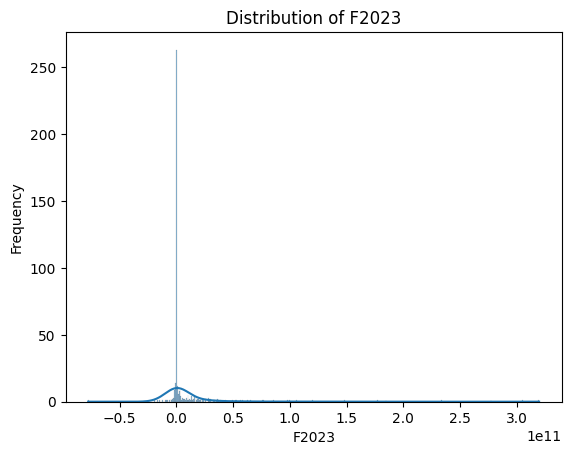

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of a specific column (e.g., F2023)
sns.histplot(df_cleaned['F2023'], kde=True)
plt.title('Distribution of F2023')
plt.xlabel('F2023')
plt.ylabel('Frequency')
plt.show()

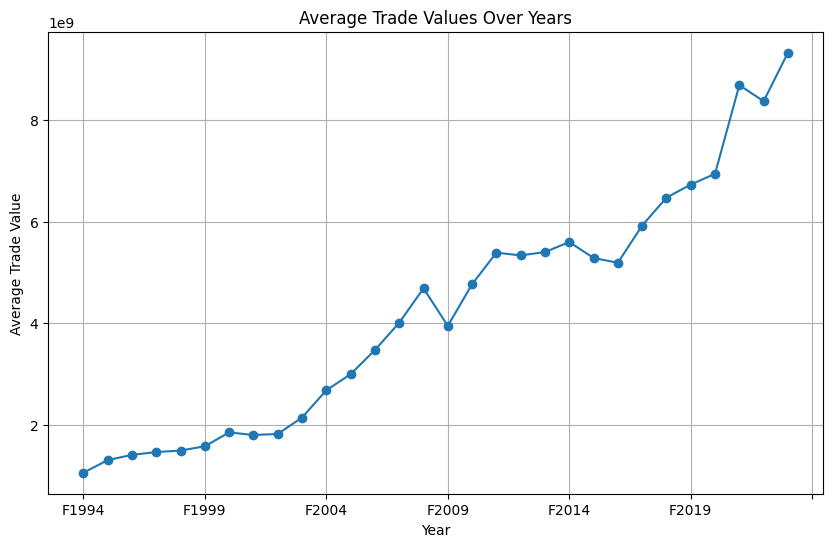

In [8]:
# Extract year columns
year_columns = [col for col in df_cleaned.columns if col.startswith('F')]
df_yearly = df_cleaned[year_columns].mean()

# Plot trends over the years
df_yearly.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Trade Values Over Years')
plt.xlabel('Year')
plt.ylabel('Average Trade Value')
plt.grid(True)
plt.show()

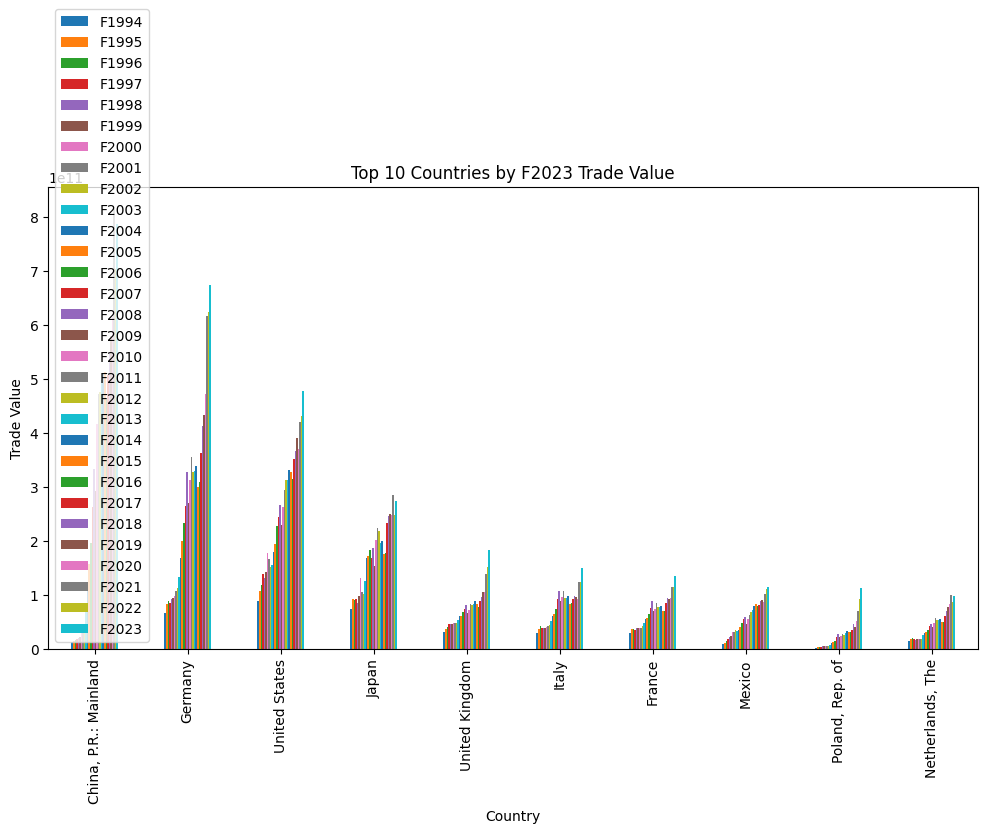

In [9]:
# Group by 'Country' and sum up trade values
if 'Country' in df_cleaned.columns:
    country_analysis = df_cleaned.groupby('Country')[year_columns].sum()

    # Top 10 countries by their total trade value in F2023
    top_countries = country_analysis.sort_values(by='F2023', ascending=False).head(10)

    # Plot top 10 countries
    top_countries.plot(kind='bar', figsize=(12, 6))
    plt.title('Top 10 Countries by F2023 Trade Value')
    plt.ylabel('Trade Value')
    plt.xlabel('Country')
    plt.show()

In [11]:
# Save cleaned dataset
cleaned_file_path = 'data/cleaned_data.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to data/cleaned_data.csv


In [12]:
# Group by year and calculate trade totals
df_cleaned['Year'] = pd.to_datetime(df_cleaned['Year'], errors='coerce').dt.year
yearly_trade = df_cleaned.groupby('Year')['Trade_Value'].sum()

# Calculate Year-over-Year growth rate
growth_rate = yearly_trade.pct_change() * 100  # Convert to percentage
print("Yearly Growth Rate:")
print(growth_rate)

# Visualize growth rate
plt.figure(figsize=(10, 6))
plt.bar(growth_rate.index, growth_rate, color='skyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Year-over-Year Growth Rate of Trade')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.show()

KeyError: 'Year'

In [13]:
print(df_cleaned.columns)

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Trade_Flow', 'Scale',
       'F1994', 'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001',
       'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009',
       'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017',
       'F2018', 'F2019', 'F2020', 'F2021', 'F2022', 'F2023'],
      dtype='object')


In [14]:
# Melt the year columns into a "Year" and "Trade_Value" format
year_columns = [col for col in df_cleaned.columns if col.startswith('F')]
df_melted = df_cleaned.melt(id_vars=['Country', 'ISO2', 'ISO3', 'Indicator', 'Trade_Flow'], 
                            value_vars=year_columns, 
                            var_name='Year', 
                            value_name='Trade_Value')

# Extract numeric year from the column names (e.g., 'F1994' -> 1994)
df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)

# Drop rows where Trade_Value is NaN or zero (if needed)
df_melted = df_melted.dropna(subset=['Trade_Value'])
df_melted = df_melted[df_melted['Trade_Value'] > 0]

# Group by year and calculate trade totals
yearly_trade = df_melted.groupby('Year')['Trade_Value'].sum()

# Calculate year-over-year growth rate
yearly_trade_growth = yearly_trade.pct_change() * 100  # Growth rate in percentage

# Display results
print("Yearly Trade Totals:")
print(yearly_trade)

print("\nYear-over-Year Growth Rate (%):")
print(yearly_trade_growth)

Yearly Trade Totals:
Year
1994    5.022727e+11
1995    6.165436e+11
1996    6.648573e+11
1997    6.918560e+11
1998    7.025730e+11
1999    7.399450e+11
2000    8.615683e+11
2001    8.393034e+11
2002    8.500367e+11
2003    1.005503e+12
2004    1.263905e+12
2005    1.409201e+12
2006    1.628225e+12
2007    1.871330e+12
2008    2.177120e+12
2009    1.826363e+12
2010    2.187711e+12
2011    2.466653e+12
2012    2.445871e+12
2013    2.470162e+12
2014    2.548145e+12
2015    2.411017e+12
2016    2.378978e+12
2017    2.711949e+12
2018    2.958351e+12
2019    3.082451e+12
2020    3.182584e+12
2021    4.012345e+12
2022    3.882714e+12
2023    4.352376e+12
Name: Trade_Value, dtype: float64

Year-over-Year Growth Rate (%):
Year
1994          NaN
1995    22.750771
1996     7.836213
1997     4.060825
1998     1.549022
1999     5.319307
2000    16.436807
2001    -2.584225
2002     1.278829
2003    18.289381
2004    25.698792
2005    11.495741
2006    15.542476
2007    14.930635
2008    16.340782
20

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Swanand Potnis\AppData\Local\Temp\ipykernel_18088\3871211175.py:9: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)


In [16]:
import numpy as np
import scipy.stats as stats

# Statistical summary for numeric columns
numeric_cols = df_melted.select_dtypes(include=['float64', 'int64']).columns
stats_summary = df_melted[numeric_cols].describe()
print("Statistical Summary:")
print(stats_summary)

# Skewness and Kurtosis
print("\nSkewness and Kurtosis for Numeric Columns:")
for col in numeric_cols:
    skewness = stats.skew(df_melted[col].dropna())
    kurtosis = stats.kurtosis(df_melted[col].dropna())
    print(f"{col}: Skewness = {skewness:.2f}, Kurtosis = {kurtosis:.2f}")

# Correlation Matrix
correlation_matrix = df_melted[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Hypothesis Testing: T-Test on Trade Value (before and after a chosen year)
chosen_year = 2010
before = df_melted[df_melted['Year'] < chosen_year]['Trade_Value'].dropna()
after = df_melted[df_melted['Year'] >= chosen_year]['Trade_Value'].dropna()

t_stat, p_value = stats.ttest_ind(before, after, equal_var=False)
print(f"\nT-Test Results: Comparing Trade Values before and after {chosen_year}")
print(f"T-Statistic = {t_stat:.2f}, P-Value = {p_value:.2e}")
if p_value < 0.05:
    print("There is a statistically significant difference in Trade Values.")
else:
    print("No statistically significant difference in Trade Values.")

Statistical Summary:
        Trade_Value
count  1.092100e+04
mean   5.378803e+09
std    1.977238e+10
min    1.209135e-04
25%    9.783935e-01
50%    3.783599e+06
75%    1.921144e+09
max    3.596288e+11

Skewness and Kurtosis for Numeric Columns:
Trade_Value: Skewness = 8.00, Kurtosis = 84.68

Correlation Matrix:
             Trade_Value
Trade_Value          1.0

T-Test Results: Comparing Trade Values before and after 2010
T-Statistic = -12.47, P-Value = 2.76e-35
There is a statistically significant difference in Trade Values.


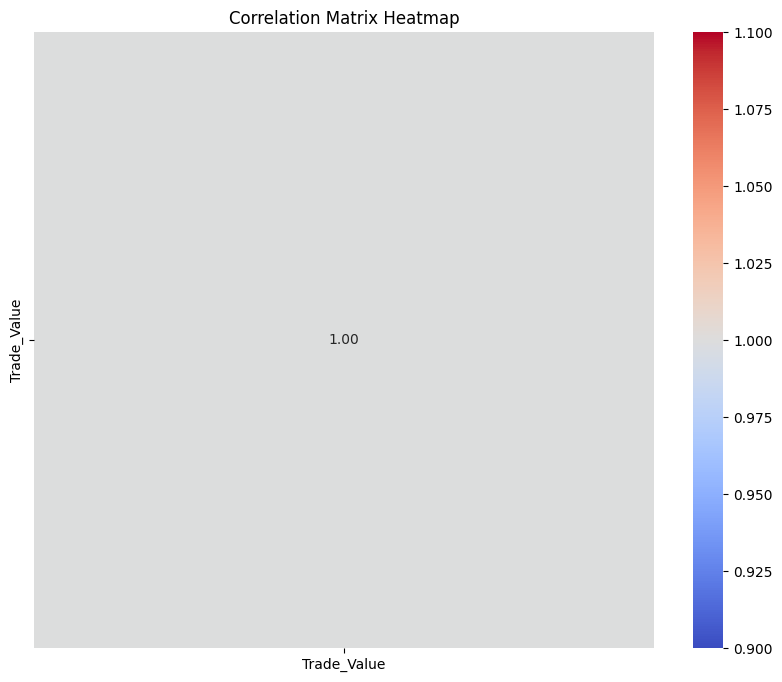

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()